<a href="https://colab.research.google.com/github/djiraffs/Deep-Learning/blob/main/Week%20UTS/Model%20MLP/UTS_Model_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown --id 1oEXSD137hPm_Fx5xSPRvlAr3silj3suK


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=0961cc06-f310-4577-a8e1-97ec0436a802
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:03<00:00, 140MB/s]


## Menampilkan isi Dataset

In [44]:
import pandas as pd

df = pd.read_csv("RegresiUTSTelkom.csv")
df.head()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

In [45]:
print(df.describe())
print(df.columns)
print(df.dtypes)
print(df.shape)

                2001       49.94357       21.47114        73.0775  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean     1998.397077      43.387113       1.289515       8.658222   
std        10.931056       6.067557      51.580393      35.268505   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954667     -26.059848     -11.462775   
50%      2002.000000      44.258490       8.417725      10.476235   
75%      2006.000000      47.833875      36.124030      29.764685   
max      2011.000000      61.970140     384.065730     322.851430   

             8.74861      -17.40628      -13.09905      -25.01202  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean        1.164110      -6.553580      -9.521968      -2.391046   
std        16.322802      22.860803      12.857763      14.571853   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487507     -20.6664

In [46]:
num_duplicates = df.duplicated().sum()
print(f"\nJumlah row yang terduplikat: {num_duplicates}")

df = df.drop_duplicates()

num_duplicates = df.duplicated().sum()
print(f"\nJumlah row yang terduplikat setelah cleaning: {num_duplicates}")
df.isnull().sum()


Jumlah row yang terduplikat: 214

Jumlah row yang terduplikat setelah cleaning: 0


,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,0
68.40795,0
-1.82223,0
-27.46348,0


In [47]:
missing = df.isnull().sum()
print("Missing values per kolom:\n", missing[missing > 0])

df_clean = df.drop_duplicates()
print("\nTipe data kolom:\n", df_clean.dtypes.value_counts())

Missing values per kolom:
 Series([], dtype: int64)

Tipe data kolom:
 float64    90
int64       1
Name: count, dtype: int64


In [48]:
print("\nData sesudah dirapihkan:")
print(df_clean.info())
print(df_clean.head())


Data sesudah dirapihkan:
<class 'pandas.core.frame.DataFrame'>
Index: 515130 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515130 non-null  int64  
 1   49.94357    515130 non-null  float64
 2   21.47114    515130 non-null  float64
 3   73.0775     515130 non-null  float64
 4   8.74861     515130 non-null  float64
 5   -17.40628   515130 non-null  float64
 6   -13.09905   515130 non-null  float64
 7   -25.01202   515130 non-null  float64
 8   -12.23257   515130 non-null  float64
 9   7.83089     515130 non-null  float64
 10  -2.46783    515130 non-null  float64
 11  3.32136     515130 non-null  float64
 12  -2.31521    515130 non-null  float64
 13  10.20556    515130 non-null  float64
 14  611.10913   515130 non-null  float64
 15  951.0896    515130 non-null  float64
 16  698.11428   515130 non-null  float64
 17  408.98485   515130 non-null  float64
 18  383.70912   515130 non-

In [64]:
def regression_model(input):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse'
    )
    return model

r_model = regression_model(X_train_processed.shape[1])
r_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

## Feature Engineering

In [49]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

y = data.iloc[:, 0]
X = data.iloc[:, 1:]

y_class = (y > y.median()).astype(int)
np.random.seed(42)
tf.random.set_seed(42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns


# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features)
    ])


preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


print("X_train shape:", X_train.shape)
print("Processed X_train shape:", X_train_processed.shape)
print("X_test shape:", X_test.shape)
print("Processed X_test shape:", X_test_processed.shape)


X_train shape: (412104, 90)
Processed X_train shape: (412104, 90)
X_test shape: (103026, 90)
Processed X_test shape: (103026, 90)


## Training Model

In [62]:
import os
import tensorflow as tf

# Perbaikan nama file agar sesuai dengan format yang diharuskan Keras
save_path = "latest_model.weights.h5"
save_dir = os.path.dirname(save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train model with callbacks
history_reg = r_model.fit(
    X_train_processed, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=6,
            restore_best_weights=True
        ),
        cp_callback  # Include the checkpoint callback here
    ],
    verbose=1
)


Epoch 1/25
10300/10303 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12670.9229
Epoch 1: saving model to training_1/cp.ckpt.weights.h5
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 12670.6387 - val_loss: 301.9181
Epoch 2/25
10281/10303 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9309.4980
Epoch 2: saving model to training_1/cp.ckpt.weights.h5
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 9307.1035 - val_loss: 133.6547
Epoch 3/25
10302/10303 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4791.8389
Epoch 3: saving model to training_1/cp.ckpt.weights.h5
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 4791.5972 - val_loss: 103.8061
Epoch 4/25
10282/10303 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 723.6531
Epoch 4: saving model to training_1/cp.ckpt.weights.h5
10303/10303 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 722.9540 - val_loss: 114.5456
Epoch 5/25
10288/10303 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.5444
Epoch 5: saving model to training_1/cp.ckpt.weights.h5
10303/10303 ━━━━━

In [68]:
r_model.load_weights("latest_model.weights.h5")  # memuat bobot
y_pred = r_model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3220/3220 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [81]:
y_pred = r_model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R-squared : {r2}")

3220/3220 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
MSE : 74.64459228515625
RMSE : 8.63971019682699
R-squared : 0.37118595838546753


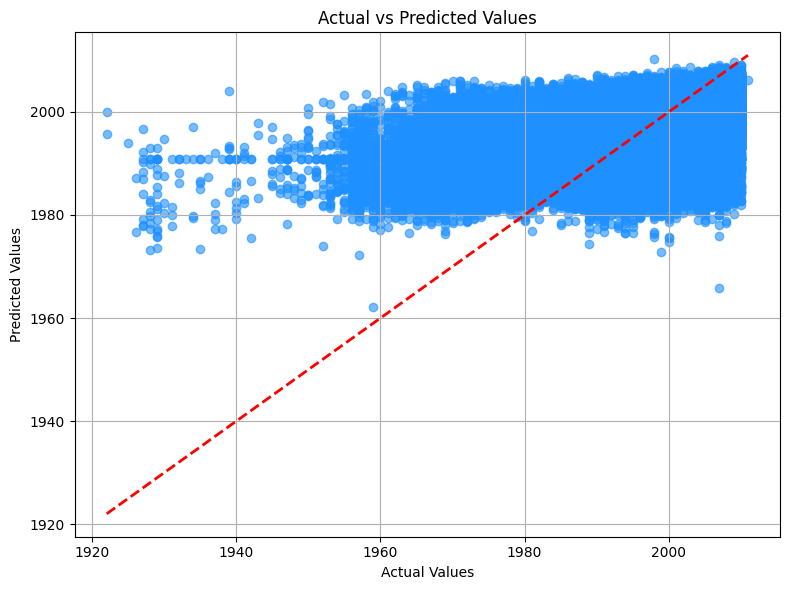

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

 Epoch  Training Loss  Validation Loss
     0   11938.397461       301.918091
     1    8235.072266       133.654724
     2    3544.574219       103.806107
     3     395.920624       114.545624
     4      85.663391        80.629845
     5      81.463722        78.306473
     6      80.274193        77.024895
     7      79.864189        76.710258
     8      79.568649        75.848549
     9      79.143059        75.970215
    10      79.051003        76.579170
    11      78.624832        75.964729
    12      78.407631        75.392242
    13      78.271324        75.795166
    14      77.969185        75.202454
    15      78.011002        75.138252
    16      77.924316        74.674370
    17      77.778633        74.986336
    18      77.628952        74.890564
    19      77.355446        75.460571
    20      77.423088        75.875076
    21      77.471786        75.556595
    22      77.210007        74.484383
    23      77.236961        74.590988
    24      76.986404    

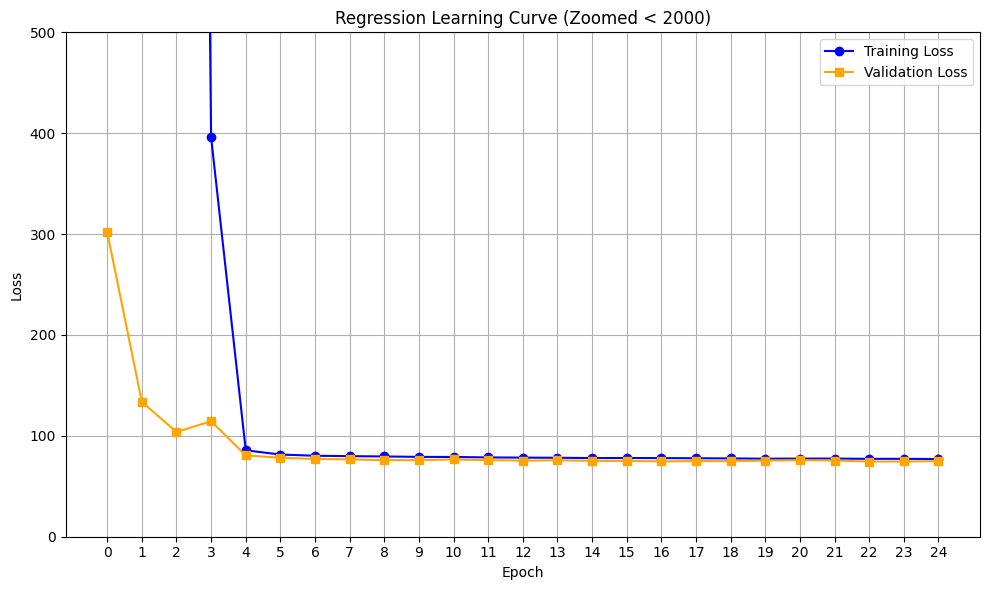

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data dari history
train_loss = history_reg.history['loss']
val_loss = history_reg.history['val_loss']
epochs = list(range(len(train_loss)))

# Buat DataFrame tabel
loss_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': train_loss,
    'Validation Loss': val_loss
})

# Tampilkan tabel
print(loss_df.to_string(index=False))

# Plot grafik yang diperbesar fokusnya
plt.figure(figsize=(10, 6))
plt.plot(loss_df['Epoch'], loss_df['Training Loss'], label='Training Loss', color='blue', marker='o')
plt.plot(loss_df['Epoch'], loss_df['Validation Loss'], label='Validation Loss', color='orange', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Regression Learning Curve (Zoomed < 2000)')
plt.ylim(0, 500)  # Batasi sumbu Y agar tidak sampai 4000
plt.xticks(loss_df['Epoch'])  # Menampilkan semua epoch secara eksplisit
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Analisis

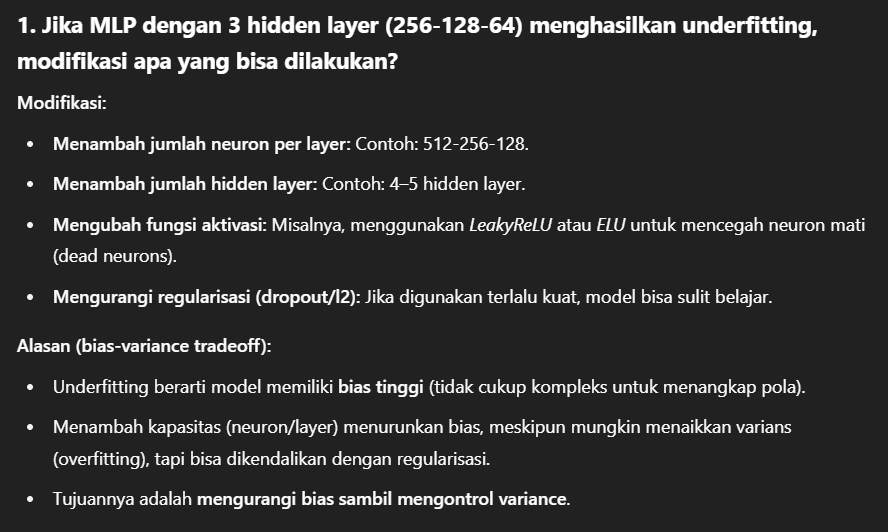

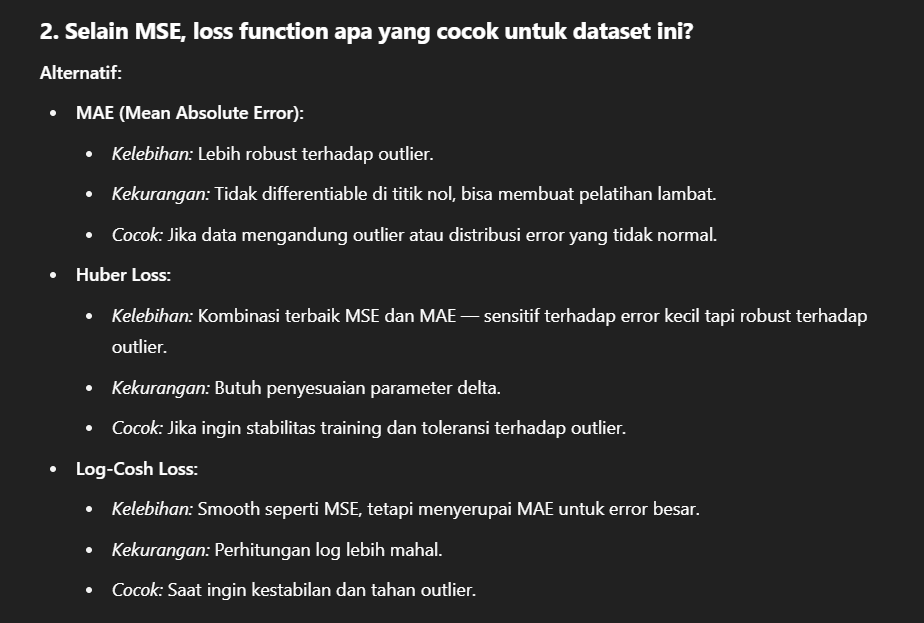

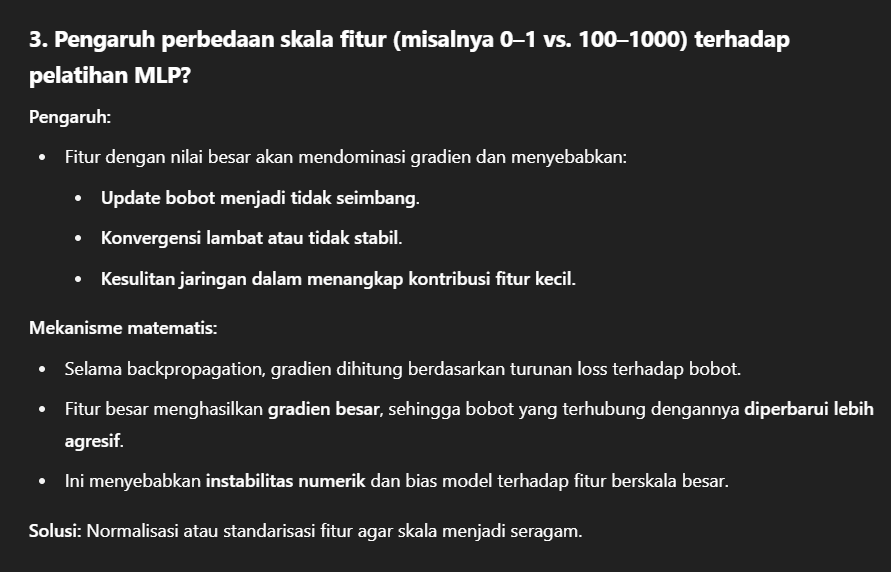

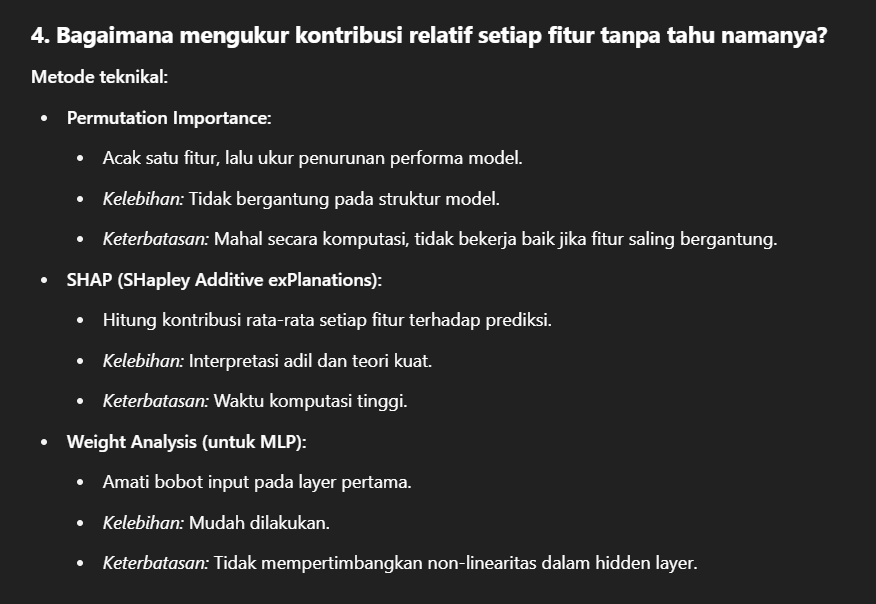

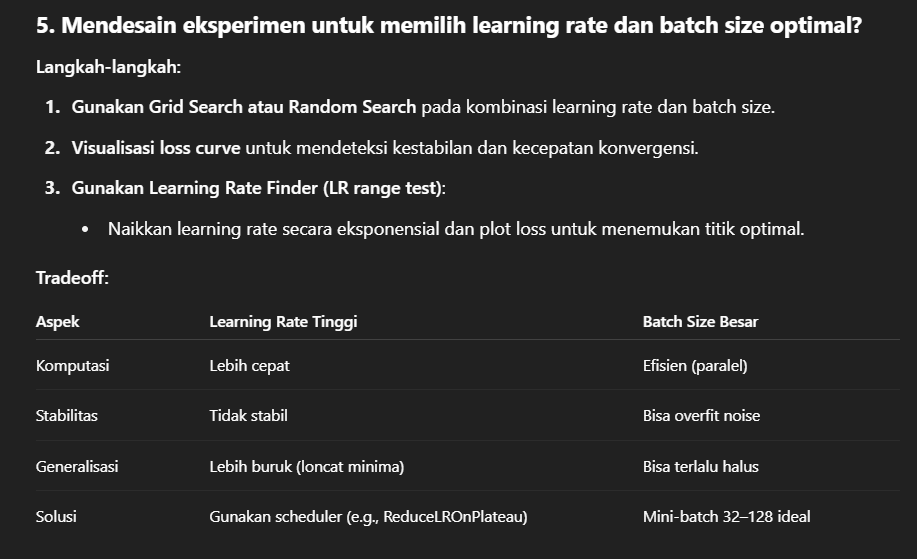